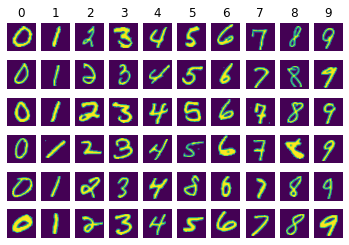

In [1]:
from KNN import *
import matplotlib.pyplot as plt
%matplotlib inline

Y, X = load_dataframe('../train.csv', nrows=200)
classes = [i for i in range(10)]
num_classes = len(classes)
samples = 6

for y in classes:
    samples_indexes = Y[Y == y].sample(samples).index
    for i, sample_index in enumerate(samples_indexes):
        plt_index = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_index)
        plt.imshow(X.iloc[sample_index].to_numpy().reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(str(y))

plt.show()


In [2]:
from sklearn.model_selection import RandomizedSearchCV
import itertools

dimensions = [14,7,4,2]
shapes = list(itertools.product(dimensions, dimensions))

hyperparameters = dict(reshape=shapes)
model = KNN(EuclideanDistanceMeasure(), 3, (28, 28))
rscv = RandomizedSearchCV(model, hyperparameters, random_state=42)
rscv.fit(X, Y)

best_params = rscv.best_params_
print(f"Best parameters: {best_params}")


[]

In [9]:
model.set_params(**best_params)

KNN(distance_measure=<KNN.EuclideanDistanceMeasure object at 0x10bcb6790>,
    k_nearest=3, reshape=(14, 14))